#  Percentiles
Los datos numéricos pueden clasificarse en orden creciente o decreciente. Así, los valores de un conjunto de datos numéricos tienen un *orden de rango*. Un percentil es el valor de un rango determinado.

Por ejemplo, si tu puntuación en un examen está en el percentil 95, una interpretación común es que sólo el 5% de las puntuaciones fueron superiores a la tuya. La mediana es el percentil 50; se suele suponer que el 50% de los valores de un conjunto de datos están por encima de la mediana.

Pero hay que tener cierto cuidado para dar a los percentiles una definición precisa que funcione para todos los rangos y todas las listas. Para ver por qué, consideremos un ejemplo extremo en el que todos los alumnos de una clase obtienen una puntuación de 75 en un examen. Entonces, 75 es un candidato natural para la mediana, pero no es cierto que el 50% de las puntuaciones sean superiores a 75. Además, 75 es un candidato igualmente natural para el percentil 95 o el 25 o cualquier otro percentil. Al definir los percentiles hay que tener en cuenta los empates, es decir, los valores iguales de los datos.


El percentil p-ésimo es el primer valor en la lista ordenada que es al menos tan grande como el p% de los elementos.

**Ejemplo:**
```python
s = [1, 7, 3, 9, 5]
s_ordenado = [1, 3, 5, 7, 9]

El percentil 80 es el elemento ordenado en la posición 4: (80/100) * 5

**Cálculo:**
- n = 5 (número de elementos)
- Posición = (p/100) * n = (80/100) * 5 = 4
- s_ordenado[4] = 9 (considerando indexación base 0)

## Un ejemplo numérico
Antes de dar una definición general, definiremos el percentil 80 de una colección de valores como el valor más pequeño de la colección que es al menos tan grande como el 80% de todos los valores.

In [1]:
import numpy as np
import pandas as pd

tamaños = np.array([12, 17, 6, 9, 7])


El percentil 80 es el valor más pequeño que es al menos tan grande como el 80% de los elementos de `tamaño`, es decir, las cuatro quintas partes de los cinco elementos. Son 12:

In [2]:
np.sort(tamaños)

array([ 6,  7,  9, 12, 17])

El percentil 80 es un valor de la lista, concretamente 12. Se puede ver que el 80% de los valores son menores o iguales a él, y que es el valor más pequeño de la lista para el que esto es cierto.

Análogamente, el percentil 70 es el valor más pequeño de la colección que es al menos tan grande como el 70% de los elementos de `tamaño`. Ahora el 70% de 5 elementos es "3,5 elementos", por lo que el percentil 70 es el 4º elemento de la lista. Eso es 12, lo mismo que el percentil 80 para estos datos.

## La función "percentil".
La función `percentil` toma dos argumentos: un rango entre 0 y 100, y un array. Devuelve el percentil correspondiente del array.

In [7]:
np.percentile(tamaños, 70)

np.float64(11.399999999999999)

### Ejemplo
La tabla `valoracion_unidades` contiene una fila por evaluacion dada por unidad de la empresa. Las columnas son la unidad y la valoracion dada.

In [8]:
valoracion_unidades = pd.read_csv('https://raw.githubusercontent.com/jphoyos/fup/main/data/valoracion_unidad.csv')
valoracion_unidades

,Unidad,Valoracion
0,1,22
1,2,12
2,2,23
3,2,14
4,1,20
...,...,...
354,5,24
355,2,16
356,2,17
357,12,16


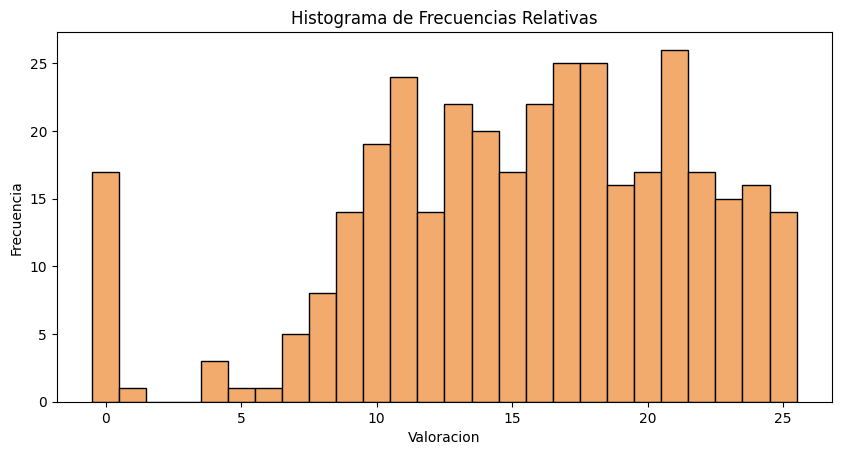

In [9]:
import matplotlib.pyplot as plot
%matplotlib inline

intervalos = np.arange(-0.5, 25.6, 1)
fig, ax1 = plot.subplots()
fig.set_figwidth(10, forward=True)

plot.hist(x=valoracion_unidades['Valoracion'], bins=intervalos, color='#F2AB6D', rwidth=1, edgecolor='black')
plot.title('Histograma de Frecuencias Relativas')
plot.xlabel('Valoracion')
plot.ylabel('Frecuencia')
#plot.xticks(intervalos)
plot.show() #se dibuja el histograma

¿Cuál es el percentil 85 de las puntuaciones? Para utilizar la función `percentil`, crea una matriz `valoracion` que contenga las puntuaciones de los parciales, y encuentra el percentil 75 y 85:

In [12]:
valoracion = valoracion_unidades.iloc[:,1]
valoracion

0      22
1      12
2      23
3      14
4      20
       ..
354    24
355    16
356    17
357    16
358    14
Name: Valoracion, Length: 359, dtype: int64

In [11]:
np.percentile(valoracion, 75)

np.float64(20.0)

In [13]:
np.percentile(valoracion,85)

np.float64(22.0)

Según la función de percentil, el percentil 75 era 20. Para comprobar que esto es coherente con nuestra nueva definición, apliquemos la definición directamente.

En primer lugar, pongamos las puntuaciones en orden creciente:

In [14]:
valoracion_ordenada = np.sort(valoracion_unidades.iloc[:,1])
valoracion_ordenada

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  4,  4,  4,  5,  6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18

Hay 359 puntuaciones en la matriz. Así que a continuación, encuentra el 75% de 359, que es 269,25.

In [15]:
0.75*359

269.25

Eso no es un número entero. Según nuestra definición, el percentil 75 es el elemento 270 de `valoracion_ordenada`, que, según la convención de indexación de Python, es el elemento 269 de la matriz.

In [16]:
valoracion_ordenada[269]

np.int64(20)

Es la misma respuesta que obtuvimos usando "percentile".

## Cuartiles
El *primer cuartil* de una colección numérica es el percentil 25. La terminología surge de *el primer cuartil*. El segundo cuartil es la mediana, y el tercer cuartil es el percentil 75.

Para nuestros datos de `valoracion', esos valores son:

In [15]:
np.percentile(valoracion, 25)

11.0

In [16]:
np.percentile(valoracion, 50)

16.0

In [17]:
np.percentile(valoracion, 75)

20.0

Las distribuciones de las puntuaciones se resumen a veces en el intervalo del "50% medio", entre el primer y el tercer cuartil. 

**Ejericios:** 
Dada la lista `s = [1, 5, 7, 3, 9]`, determinar cuáles de las siguientes afirmaciones son verdaderas:

1. `percentile(10, s) == 1`
2. `percentile(39, s) == percentile(40, s)`
3. `percentile(40, s) == percentile(41, s)`
4. `percentile(50, s) == 5`


In [20]:
s = np.array([1, 5, 7, 3, 9])
np.sort(s)

np.percentile(s, 10)

array([1, 3, 5, 7, 9])

# Clase 10 - Remuestreo
## La idea principal del bootstrap

In [29]:
import pandas as pd
import numpy as np

pensiones = pd.read_csv('https://raw.githubusercontent.com/jphoyos/fup/main/data/pension_cesantias_COL.csv')
pensiones

,Fecha,Codigo_Entidad,Nombre_Entidad,Codigo_Patrimonio,Nombre_Fondo,Valor Unidad
0,01/03/1999,1,Pensiones Y Cesantias Colpatria,1,Fondo de Cesantias Largo Plazo,5284.01
1,01/03/1999,1,Pensiones Y Cesantias Colpatria,1000,Fondo de Pensiones Moderado,4229.12
2,01/03/1999,2,Proteccion,1,Fondo de Cesantias Largo Plazo,5430.72
3,01/03/1999,2,Proteccion,1000,Fondo de Pensiones Moderado,4013.23
4,01/03/1999,3,Porvenir,1,Fondo de Cesantias Largo Plazo,5869.09
...,...,...,...,...,...,...
159845,25/04/2021,10,Colfondos S.A. Pensiones Y Cesantias,2,Fondo de Cesantias Corto Plazo,27062.41
159846,25/04/2021,10,Colfondos S.A. Pensiones Y Cesantias,1000,Fondo de Pensiones Moderado,49775.25
159847,25/04/2021,10,Colfondos S.A. Pensiones Y Cesantias,5000,Fondo de Pensiones Conservador,49220.50
159848,25/04/2021,10,Colfondos S.A. Pensiones Y Cesantias,6000,Fondo de Pensiones Mayor Riesgo,57994.17


In [31]:
ps = pensiones[['Nombre_Entidad', 'Valor Unidad']]
ps

,Nombre_Entidad,Valor Unidad
0,Pensiones Y Cesantias Colpatria,5284.01
1,Pensiones Y Cesantias Colpatria,4229.12
2,Proteccion,5430.72
3,Proteccion,4013.23
4,Porvenir,5869.09
...,...,...
159845,Colfondos S.A. Pensiones Y Cesantias,27062.41
159846,Colfondos S.A. Pensiones Y Cesantias,49775.25
159847,Colfondos S.A. Pensiones Y Cesantias,49220.50
159848,Colfondos S.A. Pensiones Y Cesantias,57994.17


In [33]:
#5 primeros con mayor pension
np.sort(pensiones['Valor Unidad'])
ps.sort_values(by='Valor Unidad', ascending=False).head(5)


,Nombre_Entidad,Valor Unidad
157580,Proteccion,64227.09
157605,Proteccion,64169.90
158105,Proteccion,64157.01
158080,Proteccion,64080.54
158055,Proteccion,64071.64


In [34]:
uni_max = ps['Valor Unidad'].max()
uni_max

np.float64(64227.09)

In [35]:
uni_min = ps['Valor Unidad'].min()
uni_min

np.float64(1872.6)

Text(0.5, 1.0, 'Histograma de Pensiones')

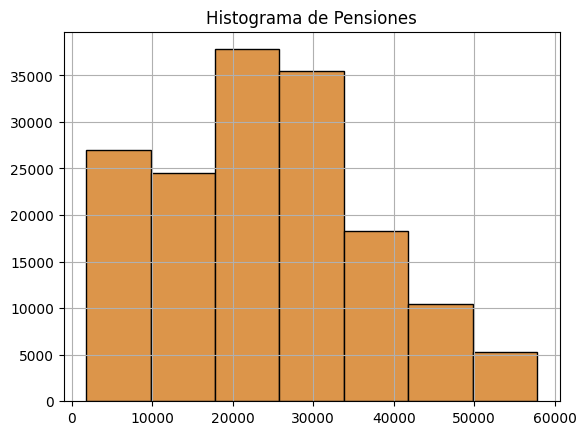

In [46]:
intervalos = np.arange(1800, 65000, 8000)

histograma = ps['Valor Unidad'].hist(bins=intervalos, color="#DC954A", edgecolor='black')
histograma.set_title('Histograma de Pensiones')


In [49]:
ps_mediana = np.percentile(ps['Valor Unidad'], 50)
ps_mediana

np.float64(24072.9)

### Muestra sin reemplazo

In [58]:
muestra = ps.sample(n=500)
muestra

,Nombre_Entidad,Valor Unidad
50086,Afp Horizonte Sociedad Administradora De Fondo...,17473.33
128158,Porvenir,42848.12
154747,Colfondos S.A. Pensiones Y Cesantias,48147.50
12890,Skandia Pensiones Y Cesantías S.A.,8824.62
136390,Skandia Pensiones Y Cesantías S.A.,35013.75
...,...,...
129832,Porvenir,30325.35
24297,Colfondos S.A. Pensiones Y Cesantias,9375.43
48148,Ing Pensiones Y Cesantias,16995.52
114156,Porvenir,28307.80


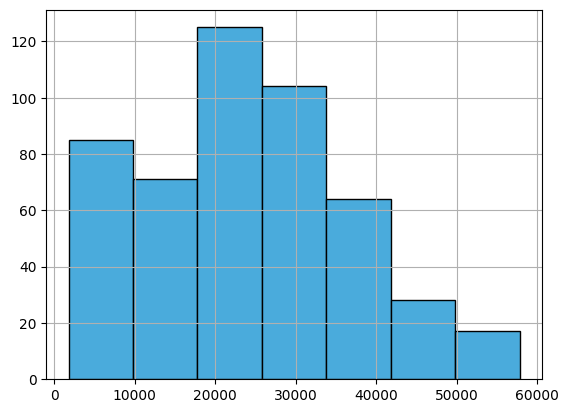

In [59]:
intervalos = np.arange(1800, 65000, 8000)

histograma_muestra = muestra['Valor Unidad'].hist(bins=intervalos, color="#4AABDC", edgecolor='black')


In [60]:
muestra_mediana = np.percentile(muestra['Valor Unidad'], 50)
muestra_mediana

np.float64(24254.075)

### Remuestra de la muestra

In [61]:
remuestra1 = muestra.sample(n= muestra.shape[0])
remuestra1

,Nombre_Entidad,Valor Unidad
45477,Colfondos S.A. Pensiones Y Cesantias,15699.10
143279,Proteccion,52997.05
6286,Colfondos S.A. Pensiones Y Cesantias,6432.29
20665,Ing Pensiones Y Cesantias,8515.09
41912,Colfondos S.A. Pensiones Y Cesantias,13770.28
...,...,...
124139,Skandia Pensiones Y Cesantías S.A.,32738.16
4862,Colfondos S.A. Pensiones Y Cesantias,6223.71
144558,Porvenir,48713.19
68779,Colfondos S.A. Pensiones Y Cesantias,19688.30
